In [100]:
import matplotlib_inline
import matplotlib.pyplot as plt 
import numpy as np
import xrayutilities as xu
import glob
import os,re

In [2]:
# read files and sorted with time.
file_list = sorted(glob.glob("*.xrdml"),key=os.path.getmtime)

In [3]:
read_file = xu.io.XRDMLFile

In [4]:
"""Class method!"""

class make_read_list_class(object):
    def __init__(self,file_list):
        name = self.__dict__
        for i in range(len(file_list)):
            file = read_file(file_list[i])
            name['data_' + str(i)] = file

"""Globals & Locals method!"""

def make_read_list(file_list):
    """From file_list read vars, and create 
        Var name is data[i].
    """
    for f in range(len(file_list)):
        createVar = globals()
        createVar['data_' + str(f)] = read_file(file_list[f])

In [5]:
All_data = make_read_list_class(file_list)

In [6]:
data_dict = All_data.__dict__

In [7]:
for dat in data_dict:
    print(dat)

data_0
data_1
data_2
data_3
data_4


line = re.search(r'countTime with \D\d+',str(data_dict['data_3']))
times = re.findall(r'\d+',line[0])
int(times[0])
print(line)

In [8]:
def find_times(data):
    line_tmp = re.search(r'countTime with \D\d+',str(data_dict[data]))
    times_tmp = re.findall(r'\d+',line_tmp[0])
    num = int(times_tmp[0])
    return num

line_tmp = re.search(r'countTime with \D\d',str(data_dict['data_2']))
times_tmp = re.findall(r'\d',line_tmp[0])
num = int(times_tmp[0])
print(line_tmp)

In [9]:
class make_line_list_class(object):
    def __init__(self,data_dict):
        lines = self.__dict__
        for d in data_dict:
            line_name = f"line_{d}"
            lines[line_name] =  find_times(d)

In [10]:
make_line_list_class(data_dict).__dict__

{'line_data_0': 1,
 'line_data_1': 3,
 'line_data_2': 10,
 'line_data_3': 17,
 'line_data_4': 21}

In [11]:
num_dict = make_line_list_class(data_dict).__dict__

In [29]:
class make_count_dict():
    def __init__(self,data_dict):
        counts = self.__dict__
        for d in data_dict:
            count = data_dict[d].scan.ddict['counts']
            if count.ndim > 1:
                counts['count_' + str(d)] = np.sum(count,axis=0)/find_times(d)
            else:
                counts['count_' + str(d)] = count

In [31]:
count_averaged = make_count_dict(data_dict).__dict__


In [70]:
list_count = [value for value in count_averaged.values()]

In [73]:
all_count = np.concatenate(list_count)

In [89]:
class make_theta_dict():
    def __init__(self,data_dict):
        thetas = self.__dict__
        for t in data_dict:
            theta = data_dict[t].scan.ddict['2Theta']
            if theta.ndim > 1:
                thetas['2theta_' + str(t)] = theta[0]
            else:
                thetas['2theta_' + str(t)] = theta

In [90]:
theta_dict = make_theta_dict(data_dict).__dict__

In [92]:
list_theta = [value for value in theta_dict.values()]
all_theta = np.concatenate(list_theta)

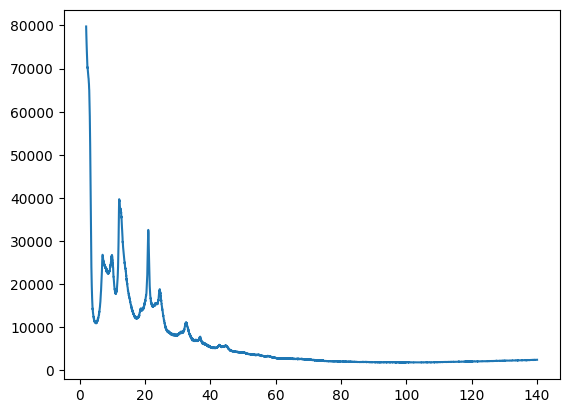

In [98]:
plt.plot(all_theta,all_count)
plt.show()

In [124]:
final_data = np.array((all_theta,all_count))

In [127]:
final_data

array([[2.01432394e+00, 2.04297182e+00, 2.07161970e+00, ...,
        1.39929952e+02, 1.39958600e+02, 1.39987248e+02],
       [7.97560000e+04, 7.83930000e+04, 7.79250000e+04, ...,
        2.44909524e+03, 2.46033333e+03, 2.47785714e+03]])

In [130]:
np.savetxt("final_data.xy",final_data,delimiter=' ')